In [1]:
#import libiraries 
import numpy as np 
import pandas as pd # data processing and read data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

import warnings

from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler as StandartScaler
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

warnings.filterwarnings("ignore")

In [2]:
column_names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston=pd.read_csv("housing.csv", delimiter=r'\s+', names=column_names) 
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
boston.shape

(506, 14)

In [5]:
boston.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
boston.describe().round()  # round دا عشان يبسط الداتا

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0
mean,4.0,11.0,11.0,0.0,1.0,6.0,69.0,4.0,10.0,408.0,18.0,357.0,13.0,23.0
std,9.0,23.0,7.0,0.0,0.0,1.0,28.0,2.0,9.0,169.0,2.0,91.0,7.0,9.0
min,0.0,0.0,0.0,0.0,0.0,4.0,3.0,1.0,1.0,187.0,13.0,0.0,2.0,5.0
25%,0.0,0.0,5.0,0.0,0.0,6.0,45.0,2.0,4.0,279.0,17.0,375.0,7.0,17.0
50%,0.0,0.0,10.0,0.0,1.0,6.0,78.0,3.0,5.0,330.0,19.0,391.0,11.0,21.0
75%,4.0,12.0,18.0,0.0,1.0,7.0,94.0,5.0,24.0,666.0,20.0,396.0,17.0,25.0
max,89.0,100.0,28.0,1.0,1.0,9.0,100.0,12.0,24.0,711.0,22.0,397.0,38.0,50.0


In [7]:
#محتاج اعملencoding عشان نحول لل object الي numerical
# missing data


data clealing & pre-processing

1- dealing with missing data

In [8]:
boston.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<Axes: >

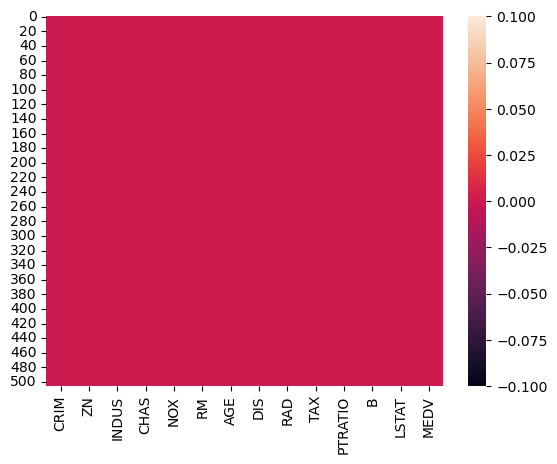

In [9]:
sns.heatmap(boston.isna())

Modeling

Split the Dataset into train and test data

In [10]:
x = boston.drop('MEDV',axis=1)
y = boston['MEDV']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.9,random_state=1)


<Axes: xlabel='MEDV', ylabel='Density'>

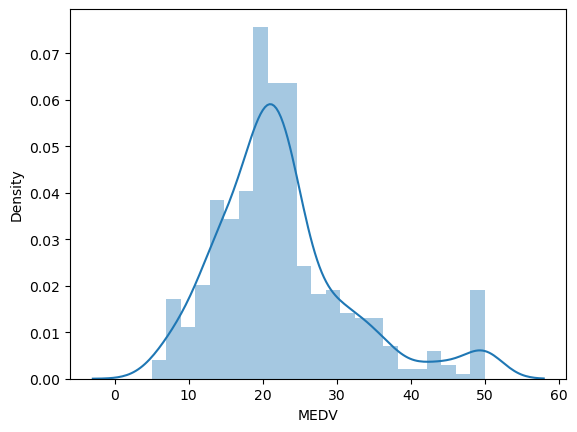

In [12]:
sns.distplot(boston.MEDV)


In [13]:
model = LinearRegression()

# Fit the model to your training data
model.fit(x_train, y_train)

LinearRegression()

In [14]:
y_pred = model.predict(x_test)
print("Predicted Values:", y_pred)

Predicted Values: [31.57697719 26.07403727 21.2058884  20.00058407 10.19703486 18.49748352
 32.84658455 16.7270624  26.03602776 24.60385722 22.52102605 27.09591028
 18.30960064 26.56875643 21.37580658 14.69095258 18.54806987 38.64763762
 28.90219035 11.13848798 18.6857611  17.2696169  23.57487422 23.06677355
 30.00432519 15.95857789 17.70191    15.47001252 34.63415641 11.14704396
 19.82543473 16.01947604 45.65733993 14.41658734 18.83720409 18.93639826
 15.73076745 26.52809498  5.16742076 16.9075249  21.10338254 20.39273838
 26.73056175 18.13947345 17.20341338 20.65567882 36.35423855 13.9092389
 25.75868936 22.00798334 22.69751756 25.63216596 22.67725894 26.60409115
  7.1803735  22.76316162 14.06580499 23.49287162 16.49597637 35.54314474
 16.64566049 26.03785131 13.46068797 21.4563035  20.19104957 30.46912049
 35.7702113  18.06237505 25.90064686 23.15673195 21.95940635  5.57817945
 10.09875999 20.22458143 18.80508367 17.27840814 25.54119888 28.2644
 21.07931446 35.55385034 19.00633622 1

In [15]:
# acureccy
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.867757109377726
0.6224709227757299


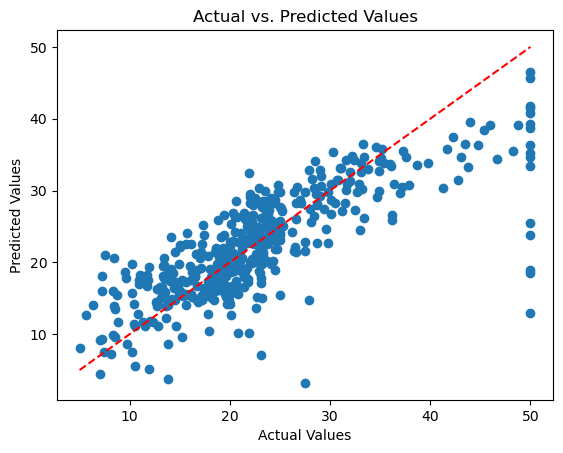

In [18]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a regression line (optional)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')

plt.show()

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate the metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Linear Regression Model: ")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Linear Regression Model: 
Mean Absolute Error (MAE): 3.8467255650584704
Mean Squared Error (MSE): 32.8385549721024
Root Mean Squared Error (RMSE): 5.730493431817403
R-squared (R2) Score: 0.6224709227757299
